## Define the function

In [1]:
# !pip3 install opencv-python

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import cv2

# load, normalize, and resize
def load_transform(filepath, 
                   img_size=(16, 16), 
                   conv_to_theta=True,
                   contrast=1, 
                   equalize=True,                   
                   crop=True,
                   flatten=True):
    
    """
    flatten (True/False) - flatten to a vector
    """
    
    # =============================================
    # Assume that this is part of the image collection        

    img = Image.open(filepath)
        
    # Assume that this is part of the image collection
    img = img.resize((128, 128))                
        
    # get the middle patch    
    img = np.array(img)
    
    if crop:
        loc = img.shape[0] // 3
        img = img[loc:loc*2, loc:loc*2] 
    
        
    # equalize histogram
    if equalize:
        
        # Set the lower threshold value to target high intensity areas
        lower_threshold = 50

        # Create the mask to discard
        _, mask = cv2.threshold(img, lower_threshold, 255, cv2.THRESH_BINARY)     
        masked_equalized_image = cv2.equalizeHist(img * (mask // 255))
        img = cv2.addWeighted(img, 0.5, masked_equalized_image, 0.5, 0)
        
        # img = cv2.equalizeHist(img)    
    
    # Assume that this is part of the image collection
    img = Image.fromarray(img)
    img = img.resize(img_size) # bicubic
    
    # change contrast
    #image brightness enhancer
    if contrast != 1:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(contrast)     
    
    # normalize
    img = np.array(img) / 255 # normalize
    
    if conv_to_theta:
        img = img * np.pi / 2 # convert to number between 0 and pi/2
    
    if flatten:
        img = img.flatten()
    
    return img

## Test on One image

In [61]:
img_size = (16, 16)

In [121]:
# Flattened
filepath = 'data/train/NonDemented/nonDem1498.jpg'
img = load_transform(filepath)
print(img.mean(), img.std())
print(img)

0.8191577719527983 0.6286528274638132
[0.         0.70839834 1.57079633 1.57079633 1.57079633 1.28743699
 0.03079993 0.         0.         0.         1.01639762 1.57079633
 1.57079633 1.57079633 0.         0.         0.         0.
 0.48663886 1.57079633 1.57079633 1.57079633 1.21351716 0.64679849
 0.57287866 1.37367679 1.57079633 1.57079633 1.57079633 0.31415927
 0.         0.         0.         0.         0.         0.
 1.15191731 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633
 1.57079633 1.57079633 0.43735898 0.         0.         0.
 0.         0.         0.         0.         0.         0.28951932
 1.57079633 1.57079633 1.57079633 1.57079633 1.57079633 0.63447852
 0.         0.         0.         0.67143843 1.34903685 0.17863958
 0.         0.         0.         0.         0.         0.30183929
 0.22791947 0.         0.08007981 0.         0.00615999 0.
 0.83159806 1.57079633 1.57079633 1.57079633 1.27511702 0.89319791
 0.43735898 0.         0.         0.         0.         

## Run on All images - Brain

In [63]:
img_size = (16, 16)

In [64]:
import glob
# train_set_0 = glob.glob("data/train/NonDemented/*.jpg")
# train_set_0 = glob.glob("data/train/NonDemented/nonDem2185.jpg")
train_set_0 = ["data/train/nonDemented/nonDem1329.jpg", "data/train/nonDemented/nonDem1117.jpg"]
train_set_1 = []

# for k in ['VeryMild', 'Mild', 'Moderate']:
for k in ['Moderate']:
    # train_set_1 += glob.glob(f"data/train/{k}Demented/*.jpg")
    train_set_1 += glob.glob(f"data/train/{k}Demented/moderateDem42.jpg")    

test_set_0 = glob.glob("data/test/NonDemented/*.jpg")
test_set_1 = []
for k in ['Moderate']:
    test_set_1 += glob.glob(f"data/test/{k}Demented/*.jpg")

print("train_set_0", len(train_set_0))
print("train_set_1", len(train_set_1))

print("test_set_0", len(test_set_0))
print("test_set_1", len(test_set_1))

train_set_0 2
train_set_1 1
test_set_0 640
test_set_1 12


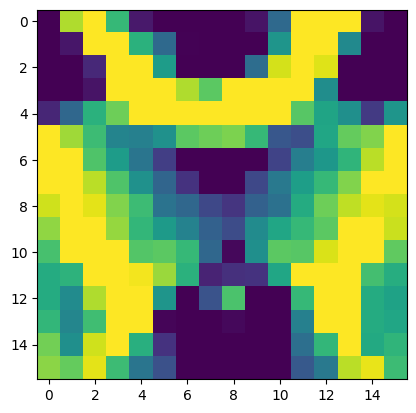

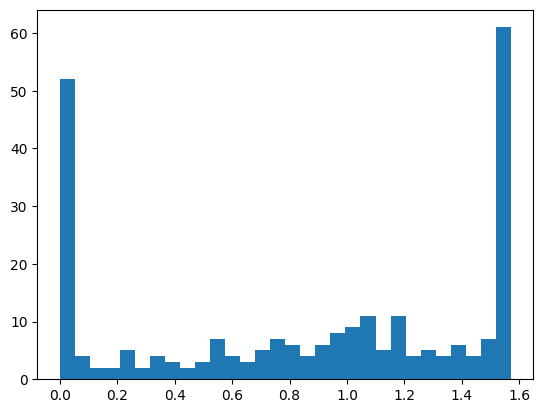

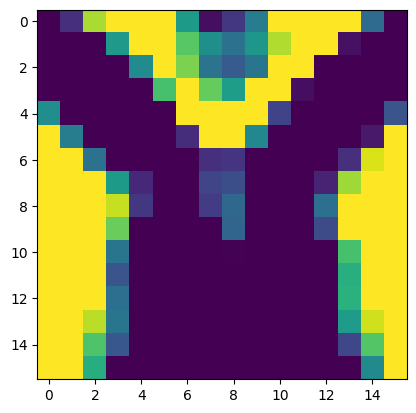

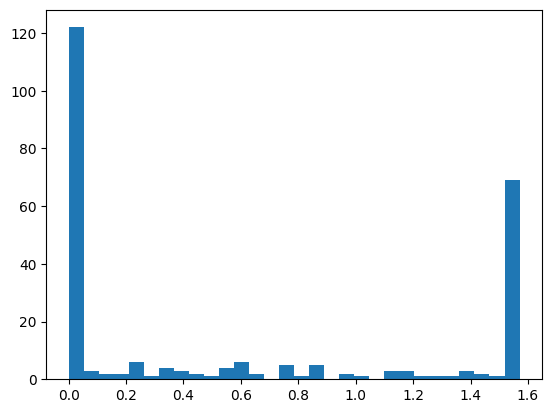

In [65]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_1])

# save
np.save('data/processed/train_set_mtx_0.npy', train_set_0b)
np.save('data/processed/train_set_mtx_1.npy', train_set_1b)

np.save('data/processed/test_set_mtx_0.npy', test_set_0b)
np.save('data/processed/test_set_mtx_1.npy', test_set_1b)

plt.imshow(np.array(train_set_0b[0]))
plt.show()
plt.hist(train_set_0b[0].flatten(), bins=30)
plt.show()

plt.imshow(np.array(train_set_1b[0]))
plt.show()
plt.hist(train_set_1b[0].flatten(), bins=30)
plt.show()

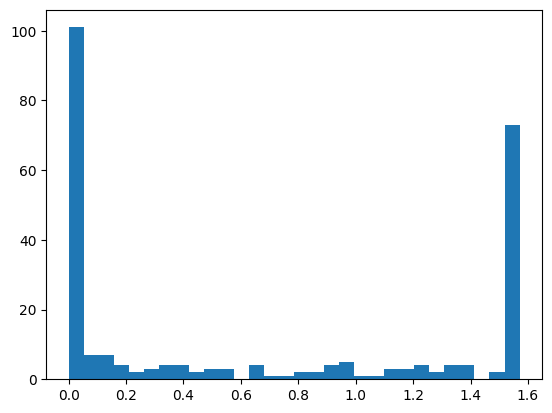

In [66]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size) for f in test_set_1])

# save
np.save('data/processed/train_set_0.npy', train_set_0b)
np.save('data/processed/train_set_1.npy', train_set_1b)

np.save('data/processed/test_set_0.npy', test_set_0b)
np.save('data/processed/test_set_1.npy', test_set_1b)

plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()

## Get an average Reference Image

In [67]:
train_set_0 = glob.glob("data/train/NonDemented/*.jpg")
train_set_1 = []
for k in ['Moderate']:
    train_set_1 += glob.glob(f"data/train/{k}Demented/*.jpg")

2560 52


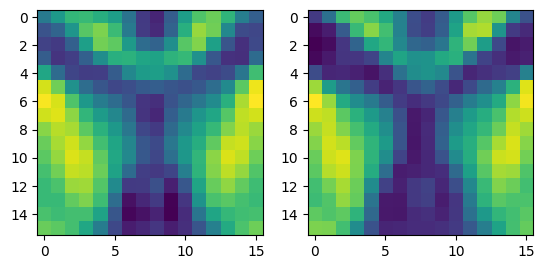

In [100]:
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False, contrast=1) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False, contrast=1) for f in train_set_1])

print(len(train_set_0b), len(train_set_1b))

f, axs = plt.subplots(1, 2)
train_set_0_mean = train_set_0b.mean(axis=0)
train_set_1_mean = train_set_1b.mean(axis=0)

axs[0].imshow(train_set_0_mean)
axs[1].imshow(train_set_1_mean)

np.save('data/processed/train_set_0_mean.npy', train_set_0_mean)
np.save('data/processed/train_set_1_mean.npy', train_set_1_mean)

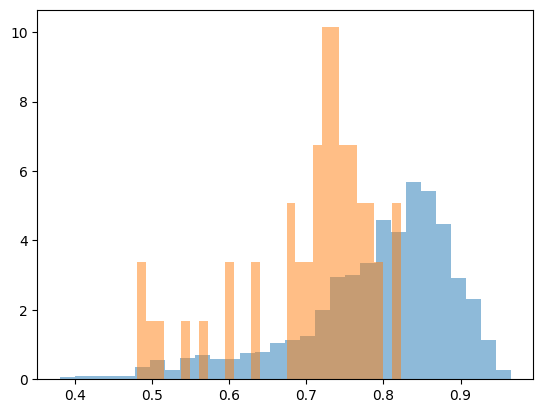

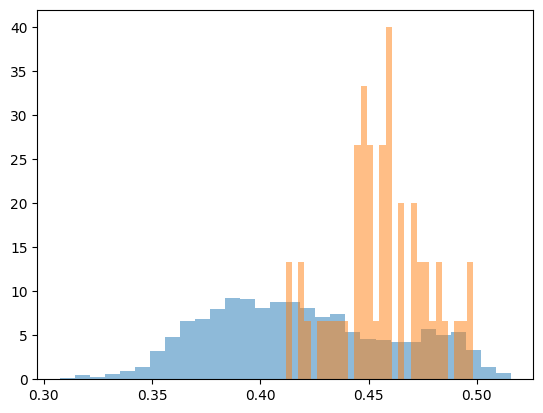

In [105]:
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=True, contrast=1) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=True, contrast=1) for f in train_set_1])

train_mean_0 =train_set_0b.mean(axis=1)
train_mean_1 =train_set_1b.mean(axis=1)

train_std_0 =train_set_0b.std(axis=1)
train_std_1 =train_set_1b.std(axis=1)

plt.hist(train_mean_0, bins=30, alpha=0.5, density=True)
plt.hist(train_mean_1, bins=30, alpha=0.5, density=True)
plt.show()

plt.hist(train_std_0, bins=30, alpha=0.5, density=True)
plt.hist(train_std_1, bins=30, alpha=0.5, density=True)
plt.show()

In [111]:
train_std_0

array([0.4392854 , 0.49752074, 0.38807441, ..., 0.40877058, 0.46581432,
       0.38256622])

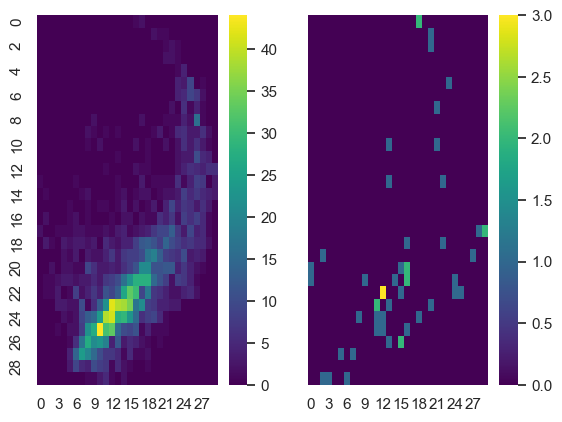

In [120]:
import seaborn as sns

# Generate data
bins=30
hist_2d_0, x_edges, y_edges = np.histogram2d(train_mean_0, train_std_0, bins=bins)
hist_2d_1, x_edges, y_edges = np.histogram2d(train_mean_1, train_std_1, bins=bins)


# Create the heatmap
f, axs = plt.subplots(1, 2, sharex=True, sharey=True)
sns.heatmap(hist_2d_0, cmap='viridis', annot=False, linewidths=0, ax=axs[0])
sns.heatmap(hist_2d_1, cmap='viridis', annot=False, linewidths=0, ax=axs[1])
plt.show()


## Appendix: Run on All images - MNIST

In [21]:
import glob
train_set_0 = glob.glob("data/mnist_train/0/*.jpg")[:50]
train_set_1 = glob.glob("data/mnist_train/1/*.jpg")[:50]

test_set_0 = glob.glob("data/mnist_test/0/*.jpg")[:50]
test_set_1 = glob.glob("data/mnist_test/1/*.jpg")[:50]

print("train_set_0", len(train_set_0))
print("train_set_1", len(train_set_1))

print("test_set_0", len(test_set_0))
print("test_set_1", len(test_set_1))

train_set_0 50
train_set_1 50
test_set_0 50
test_set_1 50


In [22]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, crop=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, crop=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, crop=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, crop=False) for f in test_set_1])

# save
np.save('data/processed/mnist_train_set_0.npy', train_set_0b)
np.save('data/processed/mnist_train_set_1.npy', train_set_1b)

np.save('data/processed/mnist_test_set_0.npy', test_set_0b)
np.save('data/processed/mnist_test_set_1.npy', test_set_1b)

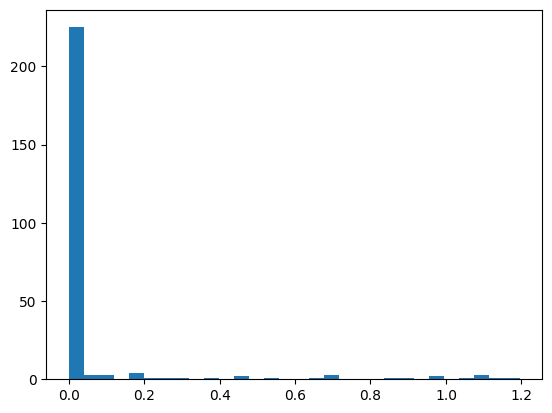

In [23]:
plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()

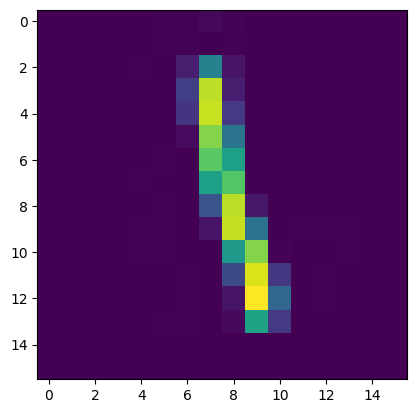

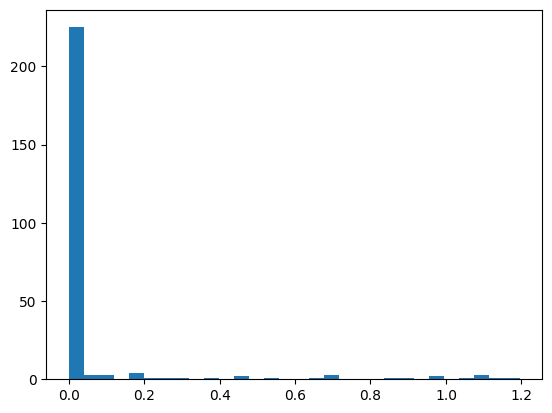

In [26]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in test_set_1])

# save
np.save('data/processed/mnist_train_set_mtx_0.npy', train_set_0b)
np.save('data/processed/mnist_train_set_mtx_1.npy', train_set_1b)

np.save('data/processed/mnist_test_set_mtx_0.npy', test_set_0b)
np.save('data/processed/mnist_test_set_mtx_1.npy', test_set_1b)

plt.imshow(np.array(test_set_1b[0]))
plt.show()
plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()